In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import rand_score, accuracy_score, v_measure_score, confusion_matrix as cm, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
file=open("fashion-mnist_train.csv", "r")

data=pd.read_csv(file)

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


Some clothes from dataset

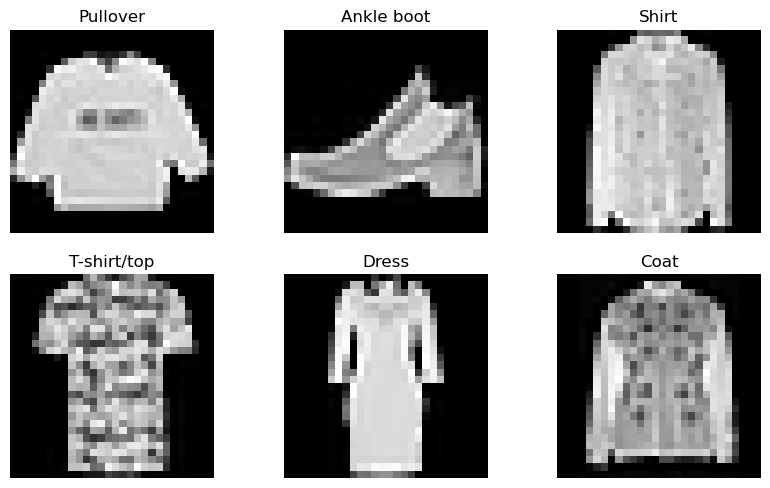

In [5]:
lab={0: 'T-shirt/top',1: 'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',
     5: 'Sandal',6: 'Shirt',7: 'Sneaker',8: 'Bag',9: 'Ankle boot'}
plt.figure(figsize=(10, 9))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    image=data.iloc[i, 1:].values.reshape(28, 28)
    plt.imshow(image)
    plt.title(lab[data.iloc[i, 0]])
    plt.axis('off')
    plt.gray()
plt.show()

I decided to reduce my data, because of compilation time.

In [7]:
data_reduced=data.iloc[:20000, :]
data_reduced.info()
data_reduced.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 119.8 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,4.484100,0.00210,0.005400,0.027500,0.109450,0.232850,0.373200,0.734150,2.160850,5.723600,...,34.89595,23.707500,16.845500,17.341750,22.279350,17.875600,8.665650,2.831350,0.88770,0.076650
std,2.879021,0.15999,0.199682,0.580138,2.583119,4.072267,5.287184,7.420298,13.909171,24.116386,...,57.63887,49.027238,41.948355,43.001823,50.987857,45.236598,29.862265,17.612601,9.44832,2.164396
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,7.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.00000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,9.000000,16.00000,16.000000,56.000000,164.000000,217.000000,230.000000,213.000000,218.000000,254.000000,...,255.00000,255.000000,254.000000,255.000000,252.000000,255.000000,250.000000,255.000000,255.00000,170.000000


In [8]:
unique_labels = data_reduced['label'].unique()
print(unique_labels)

X=MinMaxScaler().fit_transform(data_reduced.drop(columns=['label']))
label=data_reduced['label']

[2 9 6 0 3 4 5 8 7 1]


PCA- optimal number of dimensions

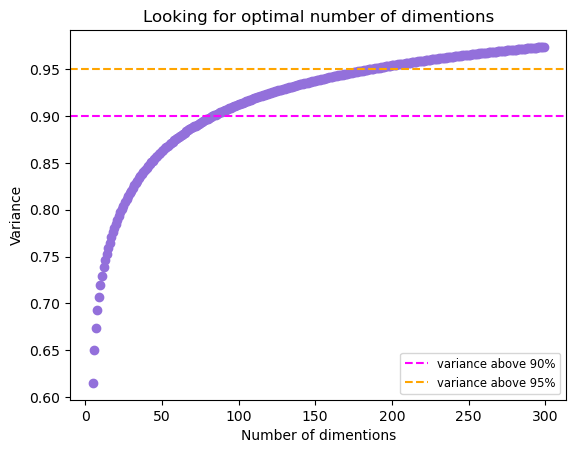

In [10]:
for i in range(5,300):
    pca=PCA(n_components=i)
    pca_results=pca.fit_transform(X)
    plt.scatter(i,sum(pca.explained_variance_ratio_),c='mediumpurple')
plt.axhline(y=0.90,c='magenta',linestyle='--',label='variance above 90%')
plt.axhline(y=0.95,c='orange',linestyle='--',label='variance above 95%')
plt.legend(fontsize='small')
plt.xlabel('Number of dimentions')
plt.ylabel('Variance')
plt.title('Looking for optimal number of dimentions')
plt.show()

In [11]:
for i in range(184,189):
    pca=PCA(n_components=i)
    pca_results=pca.fit_transform(X)
    print('n = '+str(i)+': ')
    print(sum(pca.explained_variance_ratio_))

n = 184: 
0.9496162503466594
n = 185: 
0.9499157604744446
n = 186: 
0.9502122004748368
n = 187: 
0.9505075656633194
n = 188: 
0.9507996664925004


I found the optimal number of components which variance is equal greater that 0.95 - n = 188

Data redution using T-sne

In [14]:
X_tsne = TSNE(n_components=2).fit_transform(X)

Data reduction to 2 dimentions using PCA

In [16]:
X_pca=PCA(n_components=2).fit_transform(X)

Visualization of reduced dataset

Text(0, 0.5, 'PCA2')

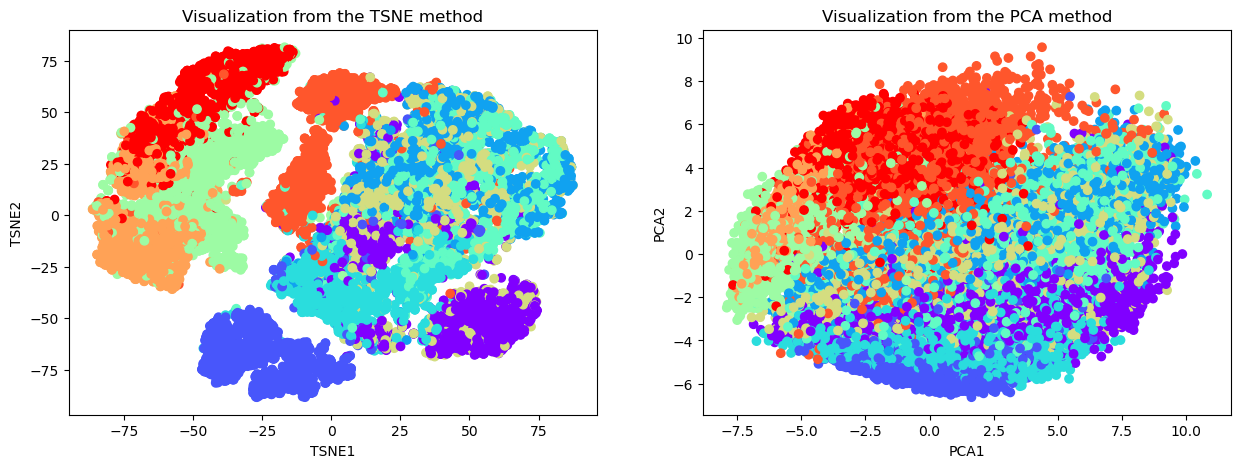

In [18]:
X_tsne_df=pd.DataFrame(data=X_tsne,columns=['TSNE1','TSNE2'])

fig,ax=plt.subplots(1, 2, figsize=(15, 5)) 
ax[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=label, cmap='rainbow')
ax[0].set_title('Visualization from the TSNE method')
ax[0].set_xlabel('TSNE1')
ax[0].set_ylabel('TSNE2')

ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=label, cmap='rainbow')
ax[1].set_title('Visualization from the PCA method')
ax[1].set_xlabel('PCA1')
ax[1].set_ylabel('PCA2')

Clustering the dataset using 2 dimentions.

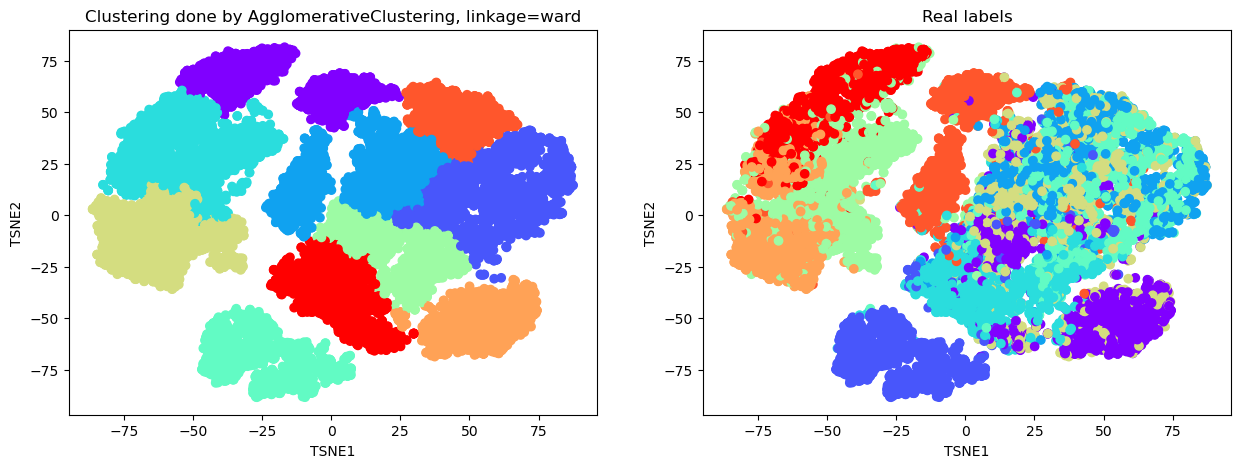

linkage=ward
Results of rand Score:  0.8880776138806941
Result of V Mesure: 0.5623412758063077



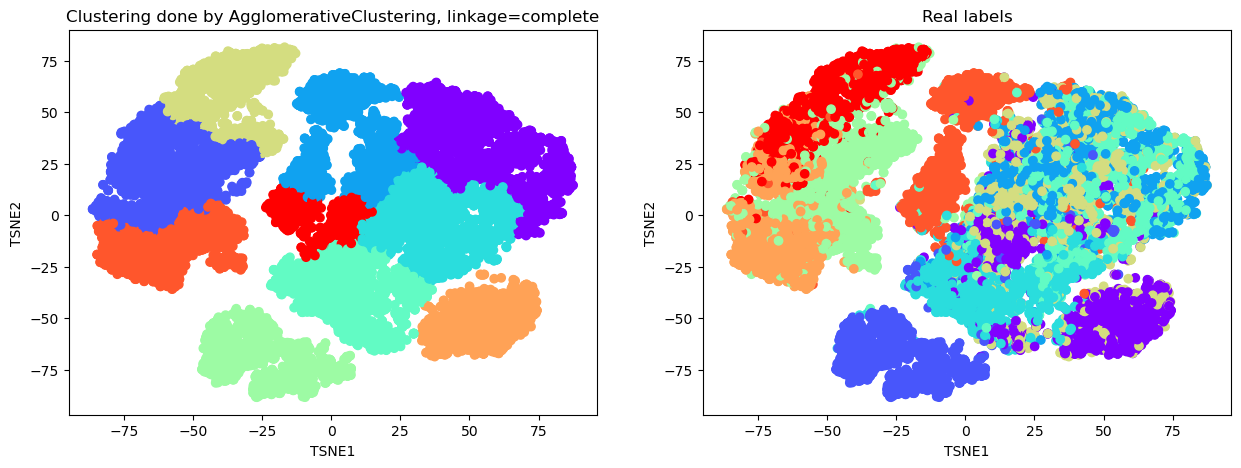

linkage=complete
Results of rand Score:  0.892402375118756
Result of V Mesure: 0.5775857393390571



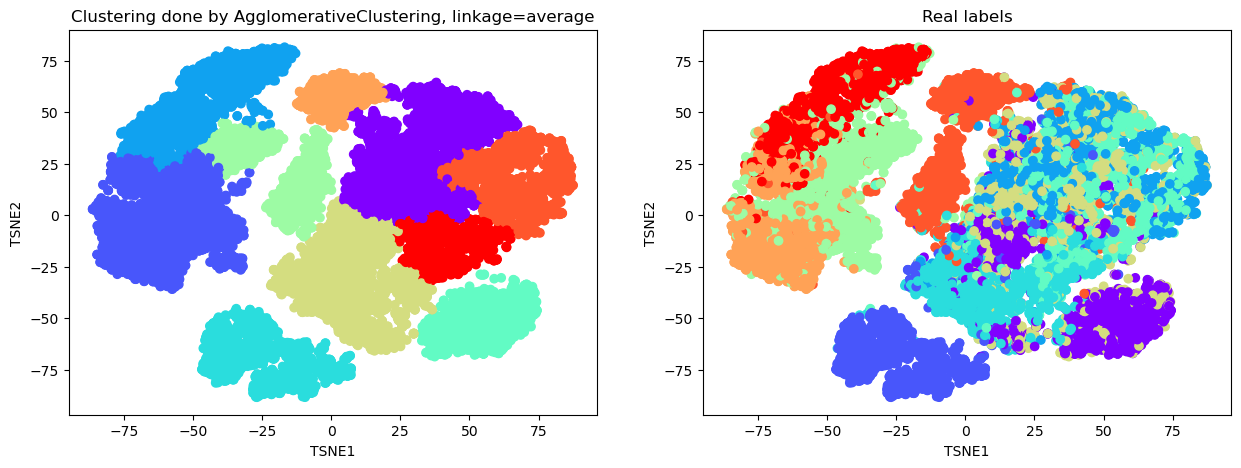

linkage=average
Results of rand Score:  0.8992523426171308
Result of V Mesure: 0.629405535484759



In [20]:
x=['ward','complete','average']
for i in x:
    hierarchy=AgglomerativeClustering(n_clusters=10, linkage=i).fit_predict(X_tsne)

    fig,ax=plt.subplots(1, 2, figsize=(15, 5)) 

    ax[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=hierarchy, cmap='rainbow')
    ax[0].set_title('Clustering done by AgglomerativeClustering, linkage='+str(i))
    ax[0].set_xlabel('TSNE1')
    ax[0].set_ylabel('TSNE2')

    ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=label, cmap='rainbow')
    ax[1].set_title('Real labels')
    ax[1].set_xlabel('TSNE1')
    ax[1].set_ylabel('TSNE2')

    plt.show()
    v=v_measure_score(label, hierarchy)
    rand=rand_score(label,hierarchy)
    print('linkage='+str(i))
    print('Results of rand Score: ', rand)
    print('Result of V Mesure: '+str(v))
    print('')

AgglomerativeClustering for 188 dimensions. I compared results with real labels using function v_measure_score, which evaluates how well the clustering corresponds to the true labels.

In [22]:
X_p=PCA(n_components=188).fit_transform(X)


hierarchy=AgglomerativeClustering(n_clusters=10, linkage='complete').fit_predict(X_p)
v=v_measure_score(label, hierarchy)
rand=rand_score(label,hierarchy)

print('Results of rand Score: ', rand)
print('Result of V Mesure: '+str(v))

Results of rand Score:  0.8373027151357568
Result of V Mesure: 0.44218682544746296


AgglomerativeClustering for 784 dimensions.

In [24]:
hierarchy=AgglomerativeClustering(n_clusters=10, linkage='complete').fit_predict(X)
v=v_measure_score(label, hierarchy)
rand=rand_score(label,hierarchy)

print('Results of rand Score: ', rand)
print('Result of V Mesure: '+str(v))

Results of rand Score:  0.8138397969898495
Result of V Mesure: 0.389925932561623


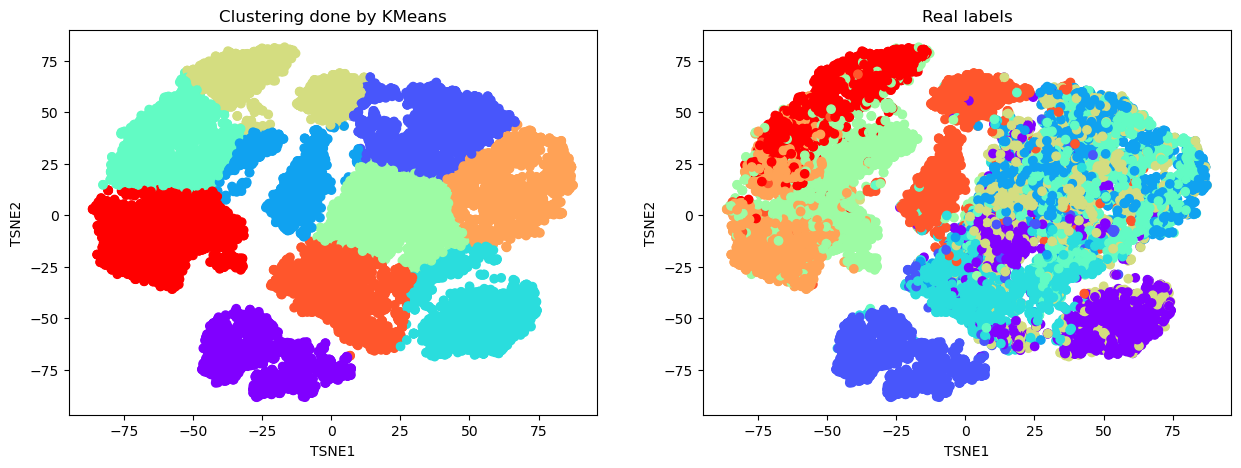

Results of rand Score:  0.8903501225061253
Result of V Mesure: 0.5596021703871291


In [25]:
X_kmeans2d = KMeans(n_clusters=10, n_init='auto',random_state=0).fit_predict(X_tsne)

fig,ax=plt.subplots(1, 2, figsize=(15, 5)) 
ax[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=X_kmeans2d, cmap='rainbow')
ax[0].set_title('Clustering done by KMeans')
ax[0].set_xlabel('TSNE1')
ax[0].set_ylabel('TSNE2')

ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=label, cmap='rainbow')
ax[1].set_title('Real labels')
ax[1].set_xlabel('TSNE1')
ax[1].set_ylabel('TSNE2')

plt.show()
v=v_measure_score(label, X_kmeans2d)
rand=rand_score(label,X_kmeans2d)

print('Results of rand Score: ', rand)
print('Result of V Mesure: '+str(v))

KMeans for 188 dimensions

In [27]:
X_kmeans = KMeans(n_clusters=10, n_init='auto',random_state=0).fit_predict(X_p)
v=v_measure_score(label, X_kmeans)
rand=rand_score(label,hierarchy)

print('Results of rand Score: ', rand)
print('Result of V Mesure: '+str(v))

Results of rand Score:  0.8138397969898495
Result of V Mesure: 0.514438616819807


KMeans for 784 dimensions

In [29]:
X_kmeans = KMeans(n_clusters=10, n_init='auto',random_state=0).fit_predict(X)
v=v_measure_score(label, X_kmeans)
rand=rand_score(label,hierarchy)

print('Results of rand Score: ', rand)
print('Result of V Mesure: '+str(v))

Results of rand Score:  0.8138397969898495
Result of V Mesure: 0.5099064996957964


DBSCAN in 2 dimensions

10 clusters for eps = 8.05 and min_samples = 228
Number of noise points: 763


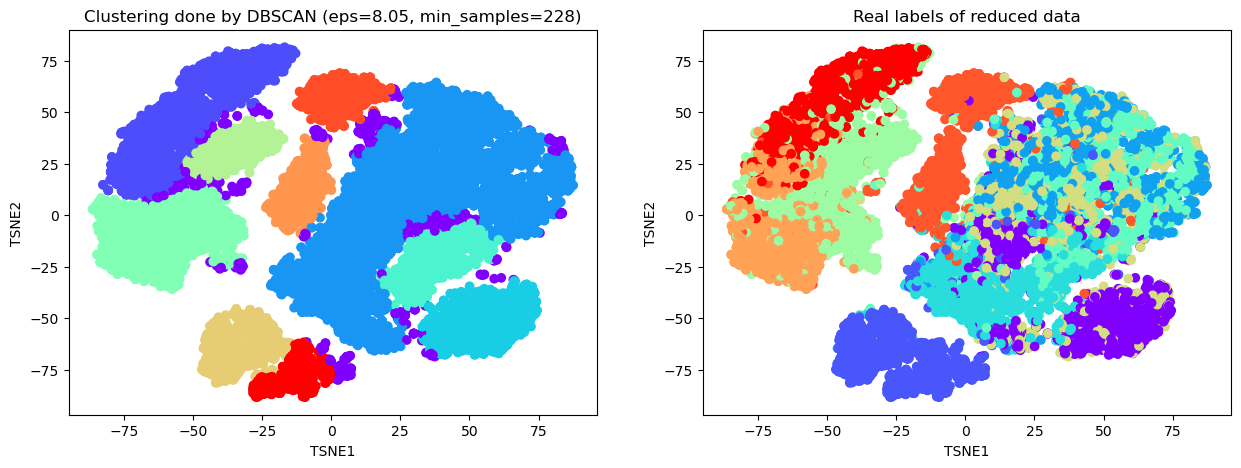

In [31]:
for eps in [x / 100 for x in range(805, 1001, 5)]: 
    for min_s in range(210, 240):  
        db = DBSCAN(eps=eps, min_samples=min_s, metric='euclidean').fit(X_tsne)
        labels = db.labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)


        if n_clusters==10 and n_noise<800:
            print(f"{n_clusters} clusters for eps = {eps} and min_samples = {min_s}")
            print(f"Number of noise points: {n_noise}")
            
            fig, ax = plt.subplots(1, 2, figsize=(15, 5)) 
          
            ax[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='rainbow')
            ax[0].set_title(f'Clustering done by DBSCAN (eps={eps}, min_samples={min_s})')
            ax[0].set_xlabel('TSNE1')
            ax[0].set_ylabel('TSNE2')

            ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=label, cmap='rainbow')
            ax[1].set_title('Real labels of reduced data')
            ax[1].set_xlabel('TSNE1')
            ax[1].set_ylabel('TSNE2')

            plt.show()
            break  

    if n_clusters==10 and n_noise<800:
        break 


In [32]:
db = DBSCAN(eps=8.05, min_samples=229, metric='euclidean').fit(X_tsne)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

v=v_measure_score(label, labels)
rand=rand_score(label,labels)

print('Results of rand Score: ', rand)
print('Result of V Mesure: '+str(v))

Results of rand Score:  0.8343549177458873
Result of V Mesure: 0.5938741685037046


I splited my full dataset into test and training.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=33)
scaler=MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

KNeighborsClassifier

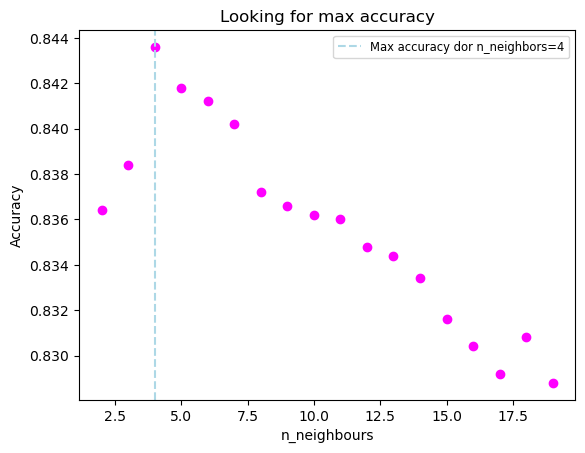

In [36]:
for j in range(2,20):
    knn=KNeighborsClassifier(n_neighbors=j)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    plt.scatter(j,accuracy,c='magenta')
plt.title('Looking for max accuracy')
plt.axvline(x=4,c='lightblue',label='Max accuracy dor n_neighbors=4',linestyle='--')
plt.xlabel('n_neighbours')
plt.legend(fontsize='small')
plt.ylabel('Accuracy')
plt.show()

Accuracy: 0.8436


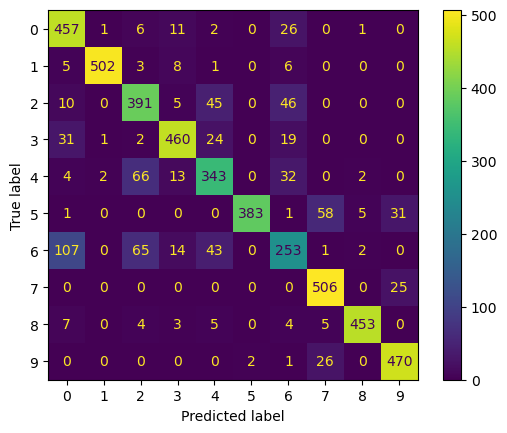

In [37]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print('Accuracy: '+str(accuracy))
conf_matrix = cm(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cm_display.plot()
plt.show()

DecisionTreeClassifier

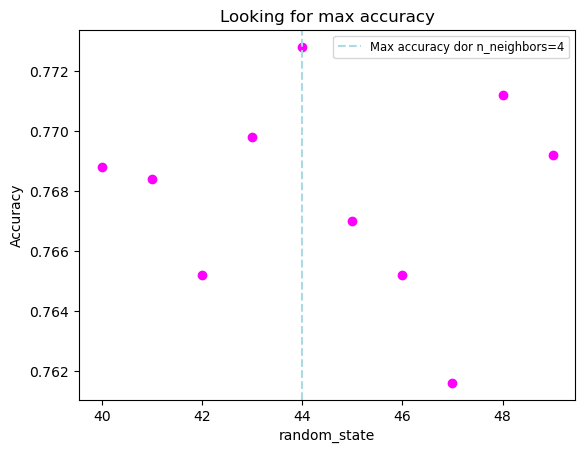

In [39]:
for n in range(40,50):
    dtee = DecisionTreeClassifier(random_state=n)
    dtee.fit(X_train, y_train)
    y_pred = dtee.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    plt.scatter(n,accuracy,c='magenta')
plt.title('Looking for max accuracy')
plt.axvline(x=44,c='lightblue',label='Max accuracy dor n_neighbors=4',linestyle='--')
plt.xlabel('random_state')
plt.legend(fontsize='small')
plt.ylabel('Accuracy')
plt.show()

Accuracy for 1: 0.205
Accuracy for 2: 0.3678
Accuracy for 3: 0.5134
Accuracy for 4: 0.6732
Accuracy for 5: 0.7192
Accuracy for 6: 0.738
Accuracy for 7: 0.771
Accuracy for 8: 0.7796
Accuracy for 9: 0.7902
Accuracy for 10: 0.7862
Accuracy for 11: 0.7896
Accuracy for 12: 0.7908
Accuracy for 13: 0.7894
Accuracy for 14: 0.7834
Accuracy for 15: 0.779
Accuracy for 16: 0.7782
Accuracy for 17: 0.7776
Accuracy for 18: 0.7782
Accuracy for 19: 0.7682


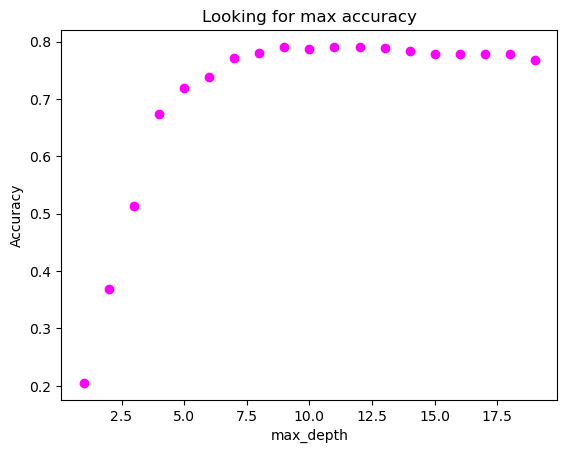

In [40]:
for m in range(1,20):
    dtee = DecisionTreeClassifier(random_state=4, max_depth=m)
    dtee.fit(X_train, y_train)
    y_pred = dtee.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy for '+str(m)+': ' + str(accuracy))
    plt.scatter(m,accuracy,c='magenta')
plt.title('Looking for max accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

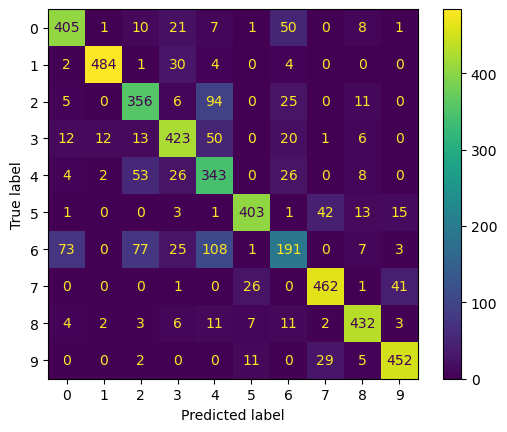

In [41]:
dtee = DecisionTreeClassifier(random_state=4, max_depth=9)
dtee.fit(X_train, y_train)
y_pred = dtee.predict(X_test)
conf_matrix = cm(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cm_display.plot()
plt.show()

RandomForestClassifier

Accuracy for 1: 0.3072
Accuracy for 2: 0.6026
Accuracy for 3: 0.704
Accuracy for 4: 0.7636
Accuracy for 5: 0.7904
Accuracy for 6: 0.8138
Accuracy for 7: 0.8228
Accuracy for 8: 0.838
Accuracy for 9: 0.8464
Accuracy for 10: 0.8538
Accuracy for 11: 0.8614
Accuracy for 12: 0.8578
Accuracy for 13: 0.866
Accuracy for 14: 0.8702
Accuracy for 15: 0.8722
Accuracy for 16: 0.874
Accuracy for 17: 0.8714
Accuracy for 18: 0.8748
Accuracy for 19: 0.874


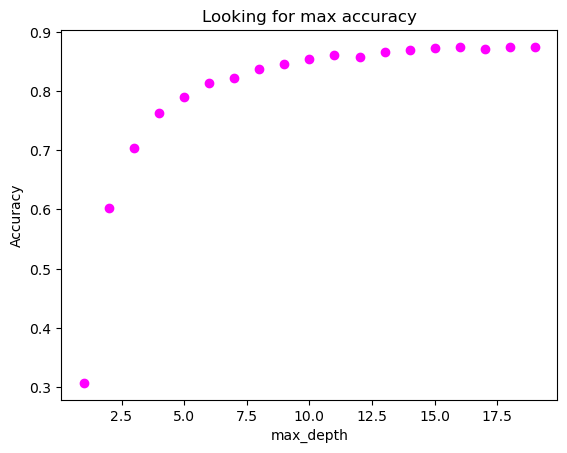

In [43]:
for m in range(1,20):
    rforest = RandomForestClassifier(n_estimators=98, random_state=49, max_depth=m)
    rforest.fit(X_train, y_train)
    y_pred = rforest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy for '+str(m)+': ' + str(accuracy))
    plt.scatter(m,accuracy,c='magenta')
plt.title('Looking for max accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

Accuracy: 0.8734


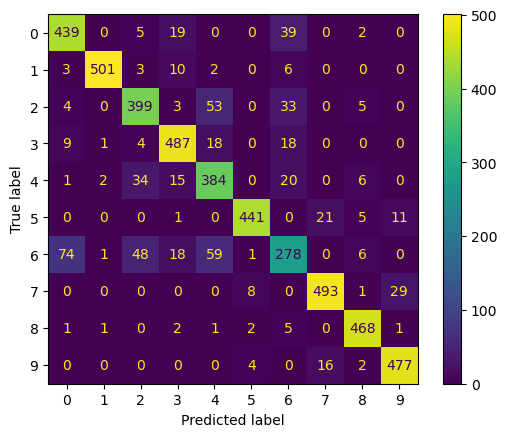

In [44]:
rforest = RandomForestClassifier(n_estimators=100, random_state=49,max_depth=18)
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(accuracy))
conf_matrix = cm(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cm_display.plot()
plt.show()